In [10]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%autosave 5

# necessary modules -------------------------------------------------------------------------------------
import socket
import sys
import os
home = os.path.expanduser("~")

sys.path.append(home+'/py_f2recom/GlobalAssessment/')
sys.path.append(home+ '/py_f2recom/modules/')
sys.path.append(home+ '/py_f2recom/modules/pyfesom2')
import pyfesom2 as pf

sys.path.append(home+'/py_f2recom/modules/SkillMetrics/')
import skill_metrics as sm
sys.path.append(home+ '/py_f2recom/modules/cmocean-master/')
import cmocean as cmo

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import time
from datetime import date
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import Dataset
from load_interp_GLODAP_python3 import GLODAPdata

Autosaving every 5 seconds


In [2]:
runid      =  'fesom'
resultpath = '/albedo/work/projects/MarESys/GCB2022/A'
evalpath = '/albedo/work/projects/p_pool_recom/eval/'
evalpath2 = '/albedo/work/projects/MarESys/ogurses/input/corrected_input/'
meshpath = '/albedo/work/projects/p_bio/mesh/core2'
# period of analysis 
first_year = 1998
last_year  = 2006
depth_limit = 50
mapproj = 'rob' # pf.get_proj('rob')
box=[-180, 180, -90, 90]

ncfileAlk                = evalpath2+'GLODAPv2.2016b.TAlk_mmol.nc'
ncfileDIC                = evalpath2+'GLODAPv2.2016b.TCO2_mmol.nc'
savepath       = !pwd

mesh       = pf.load_mesh(meshpath)
meshdiag = pf.get_meshdiag(mesh)
years = np.arange(first_year, last_year+1,1)

unit_dic = 'DIC [mmol m$^{-3}$]' # equals to mumol/L
unit_alk = 'Alk [mmol m$^{-3}$]' # equals to mumol/L

/albedo/work/projects/p_bio/mesh/core2/pickle_mesh_py3_fesom2
The usepickle == True)
The pickle file for FESOM2 exists.
The mesh will be loaded from /albedo/work/projects/p_bio/mesh/core2/pickle_mesh_py3_fesom2


In [3]:
mesh.path = meshpath

In [4]:
from DIC_Glodap_Comparison_python3 import DICcomp

DICdata = DICcomp(runid,resultpath,savepath,mesh,ncfileDIC,first_year,last_year, 
                  plotting = False, output = True, Taylor = False, uplow = [0, 100])

***
Loading GLODAP file: /albedo/work/projects/MarESys/ogurses/input/corrected_input/GLODAPv2.2016b.TCO2_mmol.nc
***
***
Depth greater in FESOM (-6125.0) than in GLODAP (-5500.0)
Please consider choosing max depth level 43 with max depth at -5275.0!
***
Upper depth: 0.0, Lower depth: -100.0
Upper depth: 0.0, Lower depth: -100.0


In [5]:
from Alk_Glodap_Comparison_python3 import Alkcomp

Alkdata = Alkcomp(runid,resultpath,savepath,mesh,ncfileAlk,first_year,last_year, 
        plotting = False, output = True, Taylor = False, uplow = [0, 100])

***
Loading GLODAP file: /albedo/work/projects/MarESys/ogurses/input/corrected_input/GLODAPv2.2016b.TAlk_mmol.nc
***
***
Depth greater in FESOM (-6125.0) than in GLODAP (-5500.0)
Please consider choosing max depth level 43 with max depth at -5275.0!
***
Upper depth: 0.0, Lower depth: -100.0
Upper depth: 0.0, Lower depth: -100.0

FESOM mean = 2165.8555, std = 498.7821, min = 504.3435, max = 2811.4191
PISCES mean = 2158.7214, std = 490.1376, min = 523.1559, max = 2698.4857


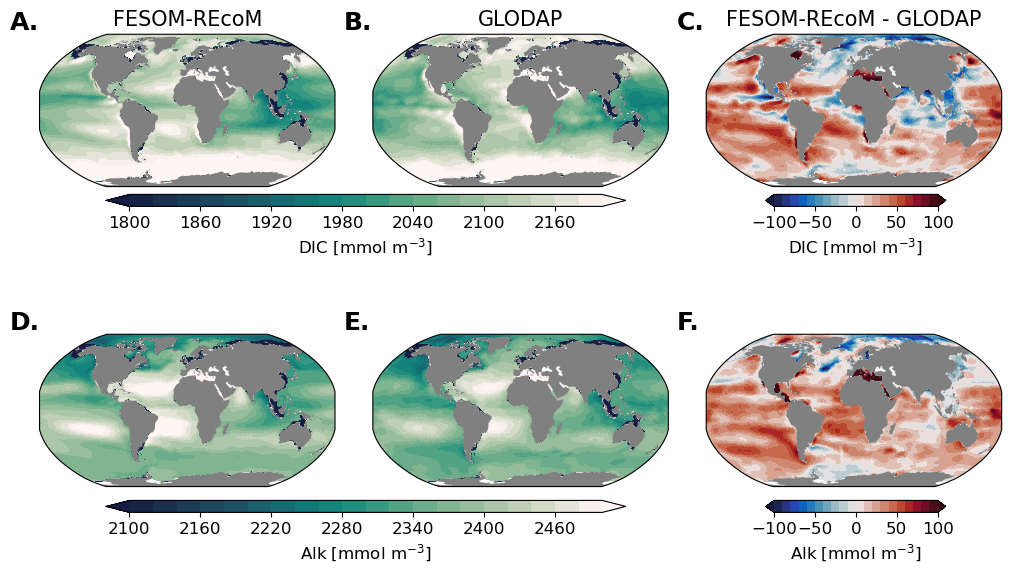

In [7]:
fig, ax = pf.create_proj_figure(mapproj, (2,3), (10,6))
#fig.tight_layout(pad=3.0)

ax = ax.flatten()

levels_dic = np.arange(1800,2220,20)
levels_dic_anom = np.arange(-100,110,10)
levels_dic_anom_ticks = np.arange(-100,150,50)
levels_alk = np.arange(2100,2520,20)
levels_alk_anom = np.arange(-100,110,10)
levels_alk_anom_ticks = np.arange(-100,150,50)


levels = np.arange(1800,2300,100)

m1 = ax[0]
f1 = pf.subplot(mesh, fig, m1, [DICdata.fesom], 
                                levels = levels_dic,
                                units=unit_dic, 
                                mapproj=mapproj, # robinson projection takes more time!
                                cmap = cmo.cm.tempo_r,
                                cmap_extension='both',
                                titles='FESOM-REcoM',
                                title_size = 15,
                               )

m2 = ax[1]
f2 = pf.subplot(mesh, fig, m2, [DICdata.glodap], 
                                levels = levels_dic,
                                units=unit_dic, 
                                mapproj=mapproj, # robinson projection takes more time!
                                cmap = cmo.cm.tempo_r,
                                cmap_extension='both',
                                titles='GLODAP',
                                title_size = 15,
                               )


cbar1_ax = fig.add_axes([0.1, 0.59, 0.52, 0.02])
cbar1 = fig.colorbar(f1,
                                    cax = cbar1_ax, 
                                    orientation = 'horizontal',
                                    fraction=0.046, pad=0.04) 
cbar1.set_label(unit_dic, fontsize=12)
cbar1.ax.tick_params(labelsize=12)


levels = np.arange(-100,120,20)

m3 = ax[2]
f3 = pf.subplot(mesh, fig, m3, [DICdata.fesom - DICdata.glodap], 
                                levels = levels_dic_anom,
                                units=unit_dic, 
                                mapproj=mapproj, # robinson projection takes more time!
                                cmap = cmo.cm.balance,
                                cmap_extension='both',
                                titles='FESOM-REcoM - GLODAP',
                                title_size = 15,
                               )

cbar3_ax = fig.add_axes([0.76, 0.59, 0.18, 0.02])
cbar3 = fig.colorbar(f3,
                                    cax = cbar3_ax, 
                                    orientation = 'horizontal',
                                    fraction=0.046, pad=0.04,
                                    ticks = levels_dic_anom_ticks) 
cbar3.set_label(unit_dic, fontsize=12)
cbar3.ax.tick_params(labelsize=12)


levels = np.arange(2100,2600,100)

m4 = ax[3]
f4 = pf.subplot(mesh, fig, m4, [Alkdata.fesom], 
                                levels = levels_alk,
                                units=unit_alk, 
                                mapproj=mapproj, # robinson projection takes more time!
                                cmap = cmo.cm.tempo_r,
                                cmap_extension='both',
                                titles='',
                                title_size = 15,
                               )

m5 = ax[4]
f5 = pf.subplot(mesh, fig, m5, [Alkdata.glodap], 
                                levels = levels_alk,
                                units=unit_alk, 
                                mapproj=mapproj, # robinson projection takes more time!
                                cmap = cmo.cm.tempo_r,
                                cmap_extension='both',
                                titles='',
                                title_size = 15,
                               )


cbar5_ax = fig.add_axes([0.1, 0.08, 0.52, 0.02])
cbar5 = fig.colorbar(f5,
                                    cax = cbar5_ax, 
                                    orientation = 'horizontal',
                                    fraction=0.046, pad=0.04) 
cbar5.set_label(unit_alk, fontsize=12)
cbar5.ax.tick_params(labelsize=12)


levels = np.arange(-100,120,20)

m6 = ax[5]
f6 = pf.subplot(mesh, fig, m6, [Alkdata.fesom - Alkdata.glodap], 
                                levels = levels_alk_anom,
                                units=unit_alk, 
                                mapproj=mapproj, # robinson projection takes more time!
                                cmap = cmo.cm.balance,
                                cmap_extension='both',
                                titles='',
                                title_size = 15,
                               )

cbar6_ax = fig.add_axes([0.76, 0.08, 0.18, 0.02])
cbar6 = fig.colorbar(f6,
                                    cax = cbar6_ax, 
                                    orientation = 'horizontal',
                                    fraction=0.046, pad=0.04,
                                    ticks = levels_alk_anom_ticks) 
cbar6.set_label(unit_alk, fontsize=12)
cbar6.ax.tick_params(labelsize=12)


m1.text(-0.1, 1.03, 'A.', transform=m1.transAxes,
            size=18, weight='bold')
m2.text(-0.1, 1.03, 'B.', transform=m2.transAxes,
            size=18, weight='bold')
m3.text(-0.1, 1.03, 'C.', transform=m3.transAxes,
            size=18, weight='bold')
m4.text(-0.1, 1.03, 'D.', transform=m4.transAxes,
            size=18, weight='bold')
m5.text(-0.1, 1.03, 'E.', transform=m5.transAxes,
            size=18, weight='bold')
m6.text(-0.1, 1.03, 'F.', transform=m6.transAxes,
            size=18, weight='bold')

plt.savefig('FIG_CARBS_MAPS.png', dpi = 300, bbox_inches='tight',transparent=False)
plt.savefig('FIG_CARBS_MAPS.pdf', bbox_inches='tight',transparent=False)

In [11]:
from DIC_Glodap_Comparison_python3 import DICcomp

DICdata = DICcomp(runid,resultpath,savepath,mesh,ncfileDIC,first_year,last_year, 
                  plotting = False, output = True, Taylor = False, uplow = [0, 10])

***
Loading GLODAP file: /albedo/work/projects/MarESys/ogurses/input/corrected_input/GLODAPv2.2016b.TCO2_mmol.nc
***
***
Depth greater in FESOM (-6125.0) than in GLODAP (-5500.0)
Please consider choosing max depth level 43 with max depth at -5275.0!
***
Upper depth: 0.0, Lower depth: -10.0
Upper depth: 0.0, Lower depth: -10.0


In [12]:
from Alk_Glodap_Comparison_python3 import Alkcomp

Alkdata = Alkcomp(runid,resultpath,savepath,mesh,ncfileAlk,first_year,last_year, 
        plotting = False, output = True, Taylor = False, uplow = [0, 10])

***
Loading GLODAP file: /albedo/work/projects/MarESys/ogurses/input/corrected_input/GLODAPv2.2016b.TAlk_mmol.nc
***
***
Depth greater in FESOM (-6125.0) than in GLODAP (-5500.0)
Please consider choosing max depth level 43 with max depth at -5275.0!
***
Upper depth: 0.0, Lower depth: -10.0
Upper depth: 0.0, Lower depth: -10.0

FESOM mean = 2320.1946, std = 112.1210, min = 1629.0943, max = 2821.6877
PISCES mean = 2313.3513, std = 110.8698, min = 1078.6228, max = 2707.2525


Text(-0.1, 1.03, 'F.')

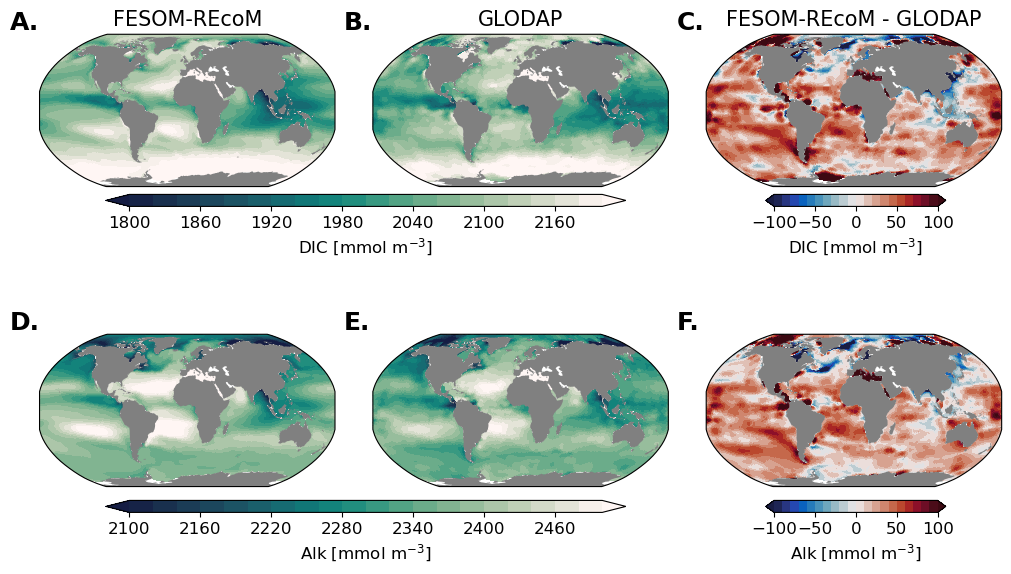

In [13]:
fig, ax = pf.create_proj_figure(mapproj, (2,3), (10,6))
#fig.tight_layout(pad=3.0)

ax = ax.flatten()

levels_dic = np.arange(1800,2220,20)
levels_dic_anom = np.arange(-100,110,10)
levels_dic_anom_ticks = np.arange(-100,150,50)
levels_alk = np.arange(2100,2520,20)
levels_alk_anom = np.arange(-100,110,10)
levels_alk_anom_ticks = np.arange(-100,150,50)


levels = np.arange(1800,2300,100)

m1 = ax[0]
f1 = pf.subplot(mesh, fig, m1, [DICdata.fesom], 
                                levels = levels_dic,
                                units=unit_dic, 
                                mapproj=mapproj, # robinson projection takes more time!
                                cmap = cmo.cm.tempo_r,
                                cmap_extension='both',
                                titles='FESOM-REcoM',
                                title_size = 15,
                               )

m2 = ax[1]
f2 = pf.subplot(mesh, fig, m2, [DICdata.glodap], 
                                levels = levels_dic,
                                units=unit_dic, 
                                mapproj=mapproj, # robinson projection takes more time!
                                cmap = cmo.cm.tempo_r,
                                cmap_extension='both',
                                titles='GLODAP',
                                title_size = 15,
                               )


cbar1_ax = fig.add_axes([0.1, 0.59, 0.52, 0.02])
cbar1 = fig.colorbar(f1,
                                    cax = cbar1_ax, 
                                    orientation = 'horizontal',
                                    fraction=0.046, pad=0.04) 
cbar1.set_label(unit_dic, fontsize=12)
cbar1.ax.tick_params(labelsize=12)


levels = np.arange(-100,120,20)

m3 = ax[2]
f3 = pf.subplot(mesh, fig, m3, [DICdata.fesom - DICdata.glodap], 
                                levels = levels_dic_anom,
                                units=unit_dic, 
                                mapproj=mapproj, # robinson projection takes more time!
                                cmap = cmo.cm.balance,
                                cmap_extension='both',
                                titles='FESOM-REcoM - GLODAP',
                                title_size = 15,
                               )

cbar3_ax = fig.add_axes([0.76, 0.59, 0.18, 0.02])
cbar3 = fig.colorbar(f3,
                                    cax = cbar3_ax, 
                                    orientation = 'horizontal',
                                    fraction=0.046, pad=0.04,
                                    ticks = levels_dic_anom_ticks) 
cbar3.set_label(unit_dic, fontsize=12)
cbar3.ax.tick_params(labelsize=12)


levels = np.arange(2100,2600,100)

m4 = ax[3]
f4 = pf.subplot(mesh, fig, m4, [Alkdata.fesom], 
                                levels = levels_alk,
                                units=unit_alk, 
                                mapproj=mapproj, # robinson projection takes more time!
                                cmap = cmo.cm.tempo_r,
                                cmap_extension='both',
                                titles='',
                                title_size = 15,
                               )

m5 = ax[4]
f5 = pf.subplot(mesh, fig, m5, [Alkdata.glodap], 
                                levels = levels_alk,
                                units=unit_alk, 
                                mapproj=mapproj, # robinson projection takes more time!
                                cmap = cmo.cm.tempo_r,
                                cmap_extension='both',
                                titles='',
                                title_size = 15,
                               )


cbar5_ax = fig.add_axes([0.1, 0.08, 0.52, 0.02])
cbar5 = fig.colorbar(f5,
                                    cax = cbar5_ax, 
                                    orientation = 'horizontal',
                                    fraction=0.046, pad=0.04) 
cbar5.set_label(unit_alk, fontsize=12)
cbar5.ax.tick_params(labelsize=12)


levels = np.arange(-100,120,20)

m6 = ax[5]
f6 = pf.subplot(mesh, fig, m6, [Alkdata.fesom - Alkdata.glodap], 
                                levels = levels_alk_anom,
                                units=unit_alk, 
                                mapproj=mapproj, # robinson projection takes more time!
                                cmap = cmo.cm.balance,
                                cmap_extension='both',
                                titles='',
                                title_size = 15,
                               )

cbar6_ax = fig.add_axes([0.76, 0.08, 0.18, 0.02])
cbar6 = fig.colorbar(f6,
                                    cax = cbar6_ax, 
                                    orientation = 'horizontal',
                                    fraction=0.046, pad=0.04,
                                    ticks = levels_alk_anom_ticks) 
cbar6.set_label(unit_alk, fontsize=12)
cbar6.ax.tick_params(labelsize=12)


m1.text(-0.1, 1.03, 'A.', transform=m1.transAxes,
            size=18, weight='bold')
m2.text(-0.1, 1.03, 'B.', transform=m2.transAxes,
            size=18, weight='bold')
m3.text(-0.1, 1.03, 'C.', transform=m3.transAxes,
            size=18, weight='bold')
m4.text(-0.1, 1.03, 'D.', transform=m4.transAxes,
            size=18, weight='bold')
m5.text(-0.1, 1.03, 'E.', transform=m5.transAxes,
            size=18, weight='bold')
m6.text(-0.1, 1.03, 'F.', transform=m6.transAxes,
            size=18, weight='bold')